In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


#### Load dataset

In [2]:
df = pd.read_csv(r"data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Split features and target

In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#### Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Standardize

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Cross-validation to find best K

In [8]:
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

#### Plotting accuracy vs. K

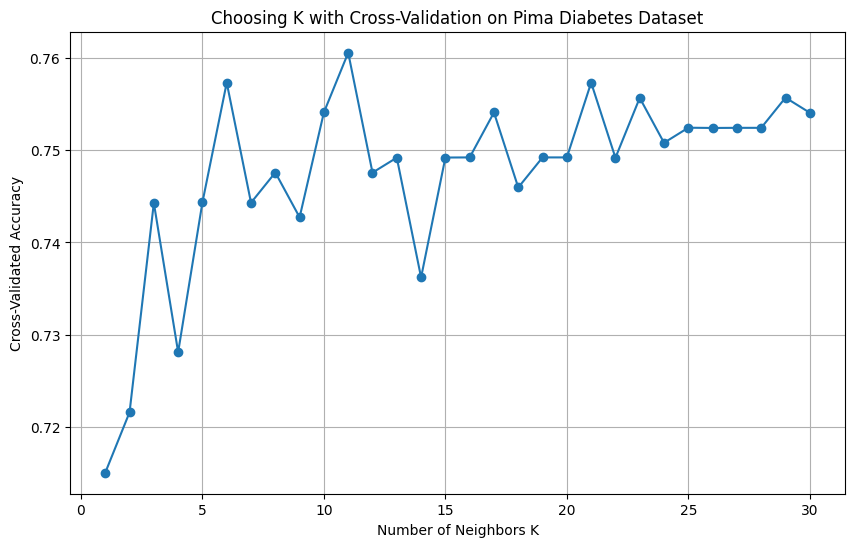

In [9]:
plt.figure(figsize=(10,6))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing K with Cross-Validation on Pima Diabetes Dataset')
plt.grid(True)
plt.show()

In [10]:
best_k = k_range[np.argmax(cv_scores)]
print(f"Best K found: {best_k} with cross-validated accuracy: {max(cv_scores):.4f}")

Best K found: 11 with cross-validated accuracy: 0.7606


#### Train final model with K

In [11]:
knn_final = KNeighborsClassifier(n_neighbors=best_k, algorithm='auto')
knn_final.fit(X_train_scaled, y_train)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


#### Train final model with K

In [12]:
y_pred = knn_final.predict(X_test_scaled)

print(f"\nTest Set Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 0.7078

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        99
           1       0.60      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154



In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.Outcome.nunique()

2

<Axes: xlabel='Outcome'>

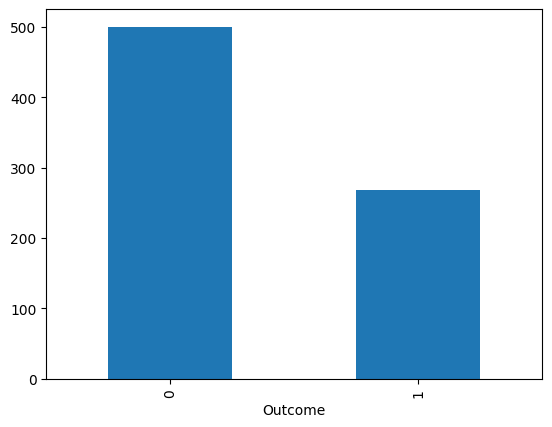

In [15]:
df["Outcome"].value_counts().plot(kind='bar')

In [37]:
from imblearn.over_sampling import SMOTE


ImportError: cannot import name 'parse_version' from 'sklearn.utils' (/home/rita/Documents/Machine_learning/Diabete_predication/diabete_env/lib/python3.10/site-packages/sklearn/utils/__init__.py)

In [36]:
import sklearn, imblearn
print("sklearn:", sklearn.__version__)
print("imbalanced‑learn:", imblearn.__version__)


ImportError: cannot import name 'parse_version' from 'sklearn.utils' (/home/rita/Documents/Machine_learning/Diabete_predication/diabete_env/lib/python3.10/site-packages/sklearn/utils/__init__.py)